# P A R T - I

## Import Packages


In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

## Load in Data

In [136]:
Titanic = sns.load_dataset('titanic')
Titanic

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

## Data Wrangling

In [138]:
#total null of null values in each column
Titanic.apply(lambda x: sum(x.isnull()),axis=0)

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [139]:
Titanic['deck'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64

### removed unwanted columns

In [140]:
Titanic.drop(['sibsp', 'parch', 'age', 'fare', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone'], axis = 1, inplace = True)
Titanic

Titanic.dropna(inplace = True)
Titanic.info()

Titanic.embarked.unique()
# array(['S', 'C', 'Q'], dtype=object)

Titanic.iloc[:,1:] = Titanic.iloc[:,1:].replace({'male':0, 'female':1, 'C':0, 'S':1, 'Q':2})
Titanic

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  889 non-null    int64 
 1   pclass    889 non-null    int64 
 2   sex       889 non-null    object
 3   embarked  889 non-null    object
dtypes: int64(2), object(2)
memory usage: 27.8+ KB


survived  pclass  sex  embarked
0           0       3    0         1
1           1       1    1         0
2           1       3    1         1
3           1       1    1         1
4           0       3    0         1
..        ...     ...  ...       ...
886         0       2    0         1
887         1       1    1         1
888         0       3    1         1
889         1       1    0         0
890         0       3    0         2

[889 rows x 4 columns]

# Identify X and Y

In [143]:

x = Titanic.drop('survived', axis = 1)
y = Titanic['survived']

## Train Test Split


In [144]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=76)

## Create Initial Decision Tree


In [145]:
decisionTree = DecisionTreeClassifier(random_state=76)
decisionTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=76)

## Assess Model

In [147]:
treePredictions = decisionTree.predict(x_test)
print(confusion_matrix(y_test, treePredictions))

[[171  10]
 [ 32  54]]


In [148]:
print(classification_report(y_test, treePredictions))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89       181
           1       0.84      0.63      0.72        86

    accuracy                           0.84       267
   macro avg       0.84      0.79      0.81       267
weighted avg       0.84      0.84      0.84       267



# P A R T - II

## Import Libraries again

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier  # the only unique line from decision tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

## Same data, data wrangling, and train/test split test

In [150]:
forest = RandomForestClassifier(n_estimators=500, random_state=76)
forest.fit(x_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=76)

## Evaluate Model Fit

In [151]:
forestPredictions = forest.predict(x_test)
print(confusion_matrix(y_test, forestPredictions))
print(classification_report(y_test, forestPredictions))

[[171  10]
 [ 32  54]]
              precision    recall  f1-score   support

           0       0.84      0.94      0.89       181
           1       0.84      0.63      0.72        86

    accuracy                           0.84       267
   macro avg       0.84      0.79      0.81       267
weighted avg       0.84      0.84      0.84       267



In [152]:
#Same exact numbers as the single tree. Same exact results, no difference.

## Hyperparameter Tuning

In [153]:
n_estimators_array = [1, 4, 5, 8, 10, 20, 50, 75, 100, 250, 500]
results = []
for n in n_estimators_array:
    forest = RandomForestClassifier(n_estimators=n, random_state=76)
    forest.fit(x_train, y_train)
    result = accuracy_score(y_test, forest.predict(x_test))
    results.append(result) 
    print(n, ':', result)

1 : 0.8426966292134831
4 : 0.8426966292134831
5 : 0.8426966292134831
8 : 0.8426966292134831
10 : 0.8426966292134831
20 : 0.8426966292134831
50 : 0.8426966292134831
75 : 0.8426966292134831
100 : 0.8426966292134831
250 : 0.8426966292134831
500 : 0.8426966292134831


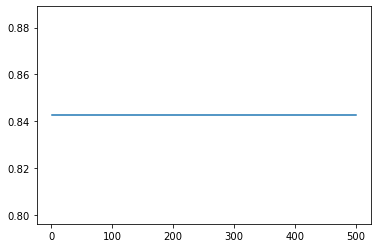

In [154]:
plt.plot(n_estimators_array, results)

In [156]:
feature_importances = pd.Series(forest.feature_importances_, index=x.columns)
feature_importances

pclass      0.230829
sex         0.690376
embarked    0.078795
dtype: float64

In [157]:
feature_importances.sort_values(inplace=True, ascending=False)
print(feature_importances)

sex         0.690376
pclass      0.230829
embarked    0.078795
dtype: float64


In [159]:
Titanic.groupby('sex')['survived'].value_counts()
# survive the dependent variable with sex an independent variable to see how sex is impacted.

sex  survived
0    0           468
     1           109
1    1           231
     0            81
Name: survived, dtype: int64